# Explorations

## Import packages and load data

### Packages

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from stopwords_loader import *


### Lexicons and corpus

In [116]:
anew_lexicon_path = Path('lexicon', 'ANEW2017', 'ANEW2017All.txt')
anew_lexicon = pd.read_csv(anew_lexicon_path, sep='\t')
anew_lexicon_list = anew_lexicon.Word.to_list()


In [117]:
nrc_lexicon_path = Path('lexicon', 'NRC-VAD-Lexicon-Aug2018Release', 'NRC-VAD-Lexicon.txt')
nrc_lexicon = pd.read_csv(nrc_lexicon_path, sep='\t', names=['Word', 'Valence', 'Arousal', 'Dominance'])
nrc_lexicon_list = nrc_lexicon.Word.to_list()

In [119]:
len(set(nrc_lexicon_list).intersection(set(anew_lexicon_list)))

3094

In [59]:
data_df = pd.read_csv('data/tweets/ExtractedTweets.csv')
data_df.head(3)

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...


In [60]:
text_list = data_df.Tweet.to_list()

### Stopwords

In [46]:
procedural_words = load_procedural_words()
nltk_stopwords = load_nltk_stopwords()
ordinal_cardinal_words = load_number_words()

The names of months, weekdays, human names, cities, states, and counties will be removed only when the first letter is capital

## Lexicons and stopwords exploration

In [61]:
print("The numbers of NRC / ANEW lexicons")
print(len(nrc_lexicon),
      '\n',
      len(anew_lexicon))

The numbers of NRC / ANEW lexicons
19971 
 3188


In [84]:
def plot_lexicon_hist(lexicon_df, val_col, aro_col, dom_col):
      fig, axs = plt.subplots(1, 3, figsize=(15,5))
      axs = axs.ravel()
      lexicon_df[val_col].hist(bins=9, ax=axs[0])
      axs[0].set_title('Valence')
      lexicon_df[aro_col].hist(bins=9, ax=axs[1])
      axs[1].set_title('Arousal')
      lexicon_df[dom_col].hist(bins=9, ax=axs[2])
      axs[2].set_title('Dominance')
      plt.show()

ANEW


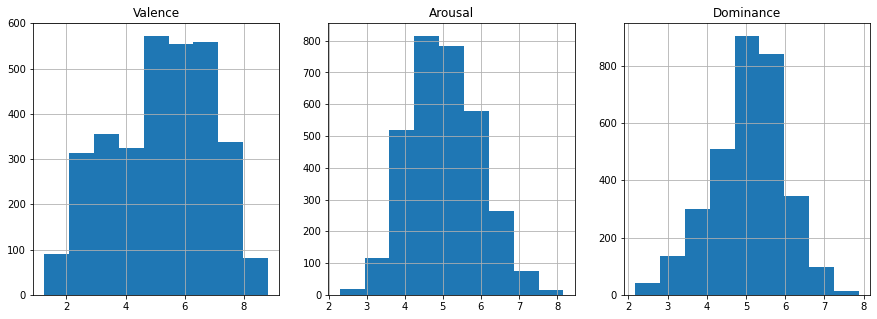

In [85]:
%matplotlib inline
print("ANEW")
plot_lexicon_hist(anew_lexicon, 'ValMn', 'AroMn', 'DomMn')

NRC


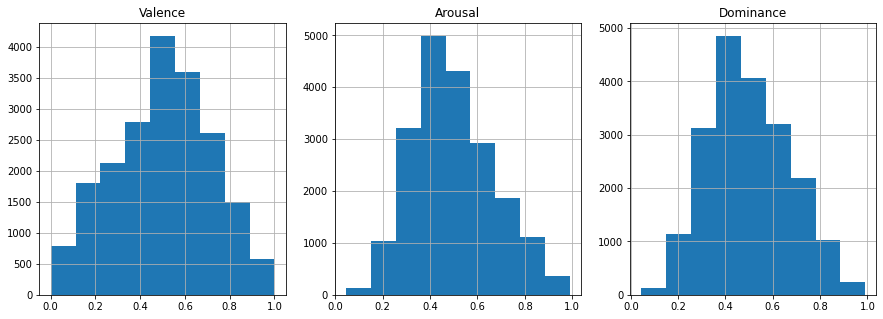

In [86]:
%matplotlib inline
print("NRC")
plot_lexicon_hist(nrc_lexicon, 'Valence', 'Arousal', 'Dominance')

In [53]:
print("Overlapping between NLTK stopwords and NRC / ANEW lexicons")
print(set(nltk_stopwords).intersection(set(nrc_lexicon)),
      '\n',
      set(nltk_stopwords).intersection(set(anew_lexicon)))

Overlapping between NLTK stopwords and NRC / ANEW lexicons
{'can', 'will', 'have', 'be', 'haven', 'other', 'down', 'don', 'do'} 
 {'me', 'haven'}


In [54]:
print("Overlapping between procedural words and NRC / ANEW lexicons")
print(set(procedural_words).intersection(set(nrc_lexicon)),
      '\n',
      set(procedural_words).intersection(set(anew_lexicon)))

Overlapping between procedural words and NRC / ANEW lexicons
{'democrat', 'house', 'speaker', 'chair', 'state', 'gentleman', 'republican', 'yield', 'congressman', 'floor', 'senator', 'chairman', 'committee', 'member', 'senate', 'congress'} 
 {'house', 'chair', 'gentleman', 'committee', 'member'}


In [55]:
print("Overlapping between ordinal and cardinal number words and NRC / ANEW lexicons")
print(set(ordinal_cardinal_words).intersection(set(nrc_lexicon)),
      '\n',
      set(ordinal_cardinal_words).intersection(set(anew_lexicon)))

Overlapping between ordinal and cardinal number words and NRC / ANEW lexicons
{'ten', 'fourth', 'eight', 'third', 'tenth', 'eighteen', 'thirty', 'twentieth', 'second', 'ninth', 'three', 'eleven', 'thirteenth', 'ninety', 'twelve', 'eighty', 'fifty', 'sixteen', 'forty', 'twelfth', 'sixty', 'eighth', 'nine', 'seventeen', 'twenty', 'first', 'fourteen', 'nineteen', 'four', 'thirteen', 'seventh', 'fifteen', 'six', 'eleventh', 'one', 'sixth', 'two', 'seven', 'seventy', 'five'} 
 {'twelve', 'first', 'nine'}


**Although the NRC lexicon has more data, ANEW might be more suitable for political text.**

## Data exploration

In [98]:
len(data_df)

86460

In [112]:
data_df.groupby('Party').count().Tweet

Party
Democrat      42068
Republican    44392
Name: Tweet, dtype: int64

In [113]:
data_df[data_df.Party=='Democrat'].groupby('Handle').count().Tweet.describe()

count    211.000000
mean     199.374408
std        8.262198
min       80.000000
25%      200.000000
50%      200.000000
75%      200.000000
max      200.000000
Name: Tweet, dtype: float64

In [114]:
data_df[data_df.Party=='Republican'].groupby('Handle').count().Tweet.describe()

count    222.000000
mean     199.963964
std        0.249086
min      197.000000
25%      200.000000
50%      200.000000
75%      200.000000
max      200.000000
Name: Tweet, dtype: float64